In [1]:
# Imports
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.dates as mdates

import numpy as np
import pandas as pd
import math 

from utils import get_time_diff_from_issue_df, get_count_from_issue_df, get_time_from_issue_df, iqr_outlier_filter, examine_data

In [2]:
# Globals
issue_file = 'issue_data.csv'
pr_file = 'pr_data.csv'

In [3]:
issue_df = pd.read_csv(issue_file, parse_dates=['opened', 'assigned', 'pr_made', 'closed'], converters={'labels': lambda x: x.split('|')})
pr_df = pd.read_csv(pr_file)

In [4]:
pd.set_option("display.max_rows", 70)
#issue_df.head(70)
#issue_df.tail(70)
#examine_data(issue_df, 'pr_made', 'closed', 'large', rows=70, func=lambda x,y: x.head(y))

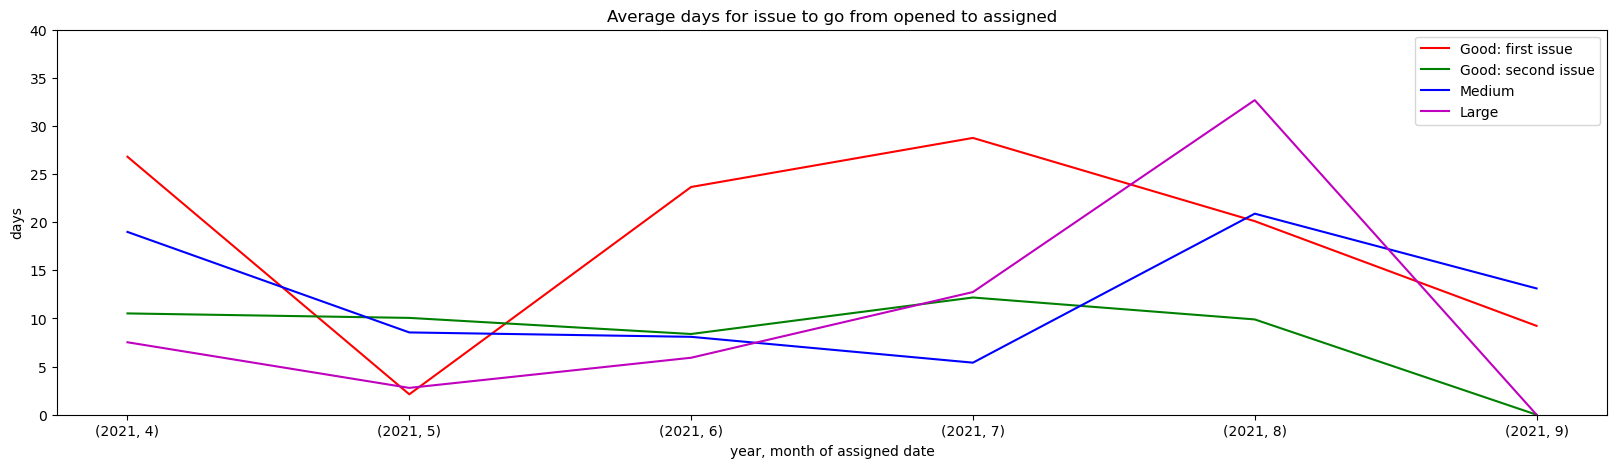

In [5]:
# Plotting
past_count = 6
base_round = 5
time1 = 'opened'
time2 = 'assigned'
all_y = []
plt.figure(figsize=(20,5))
x, y = get_time_diff_from_issue_df(issue_df, time1, time2, 'first issue', 'product')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='r', label='Good: first issue')
x, y = get_time_diff_from_issue_df(issue_df, time1, time2, 'second issue', 'product')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='g', label='Good: second issue')
x, y = get_time_diff_from_issue_df(issue_df, time1, time2, 'medium', 'product')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='b', label='Medium')
x, y = get_time_diff_from_issue_df(issue_df, time1, time2, 'large', 'product')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='m', label='Large')
plt.ylim([0, base_round * (round(max(all_y)/base_round) + 1)])
plt.title(f'Average days for issue to go from {time1} to {time2}')
plt.xlabel(f'year, month of {time2} date')
plt.ylabel('days')
plt.legend()
plt.show()

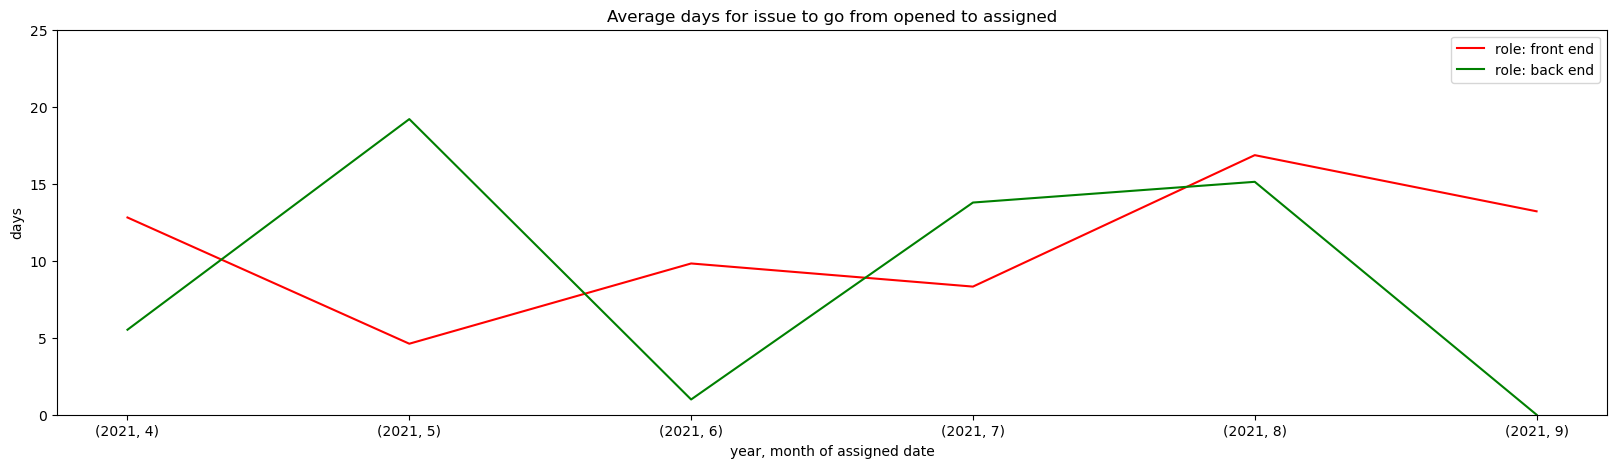

In [6]:
# Plotting
past_count = 6
base_round = 5
time1 = 'opened'
time2 = 'assigned'
all_y = []
plt.figure(figsize=(20,5))
x, y = get_time_diff_from_issue_df(issue_df, time1, time2, 'role: front end', 'product')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='r', label='role: front end')
x, y = get_time_diff_from_issue_df(issue_df, time1, time2, 'role: back end', 'product')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='g', label='role: back end')
#x, y = get_time_diff_from_issue_df(issue_df, time1, time2, 'role: design', 'product')
#all_y.extend(y[-past_count:])
#plt.plot(x[-past_count:], y[-past_count:], color='b', label='role: design')
plt.ylim([0, base_round * (round(max(all_y)/base_round) + 1)])
plt.title(f'Average days for issue to go from {time1} to {time2}')
plt.xlabel(f'year, month of {time2} date')
plt.ylabel('days')
plt.legend()
plt.show()

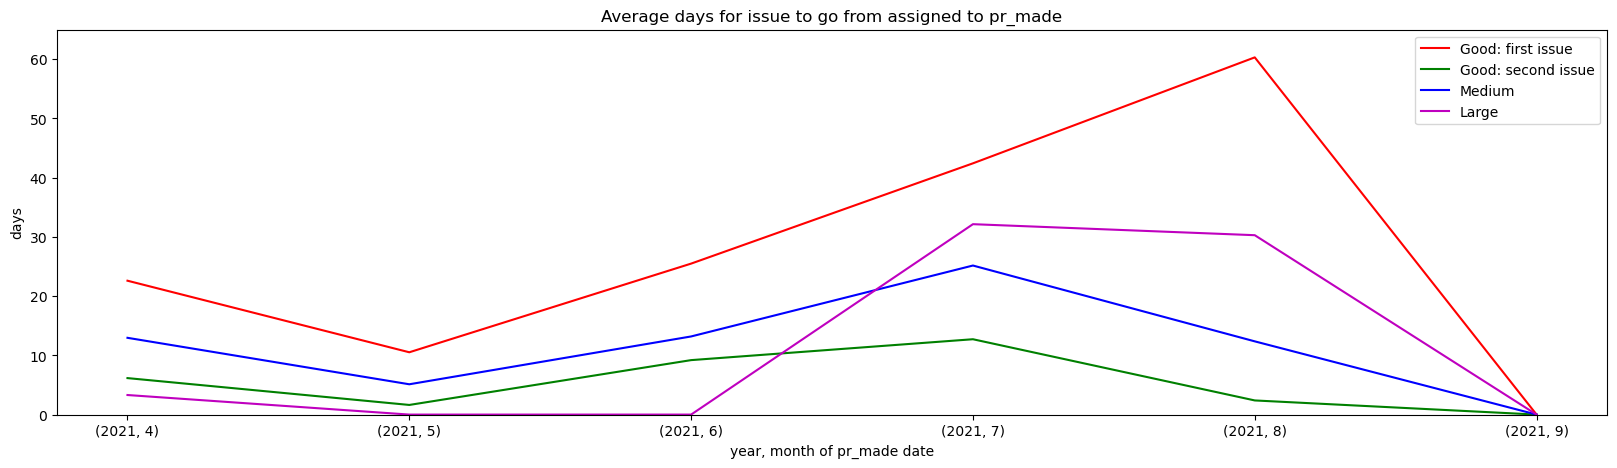

In [7]:
# Plotting
past_count = 6
base_round = 5
time1 = 'assigned'
time2 = 'pr_made'
all_y = []
plt.figure(figsize=(20,5))
x, y = get_time_diff_from_issue_df(issue_df, time1, time2, 'first issue', 'product')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='r', label='Good: first issue')
x, y = get_time_diff_from_issue_df(issue_df, time1, time2, 'second issue', 'product')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='g', label='Good: second issue')
x, y = get_time_diff_from_issue_df(issue_df, time1, time2, 'medium', 'product')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='b', label='Medium')
x, y = get_time_diff_from_issue_df(issue_df, time1, time2, 'large', 'product')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='m', label='Large')
plt.ylim([0, base_round * (round(max(all_y)/base_round) + 1)])
plt.title(f'Average days for issue to go from {time1} to {time2}')
plt.xlabel(f'year, month of {time2} date')
plt.ylabel('days')
plt.legend()
plt.show()

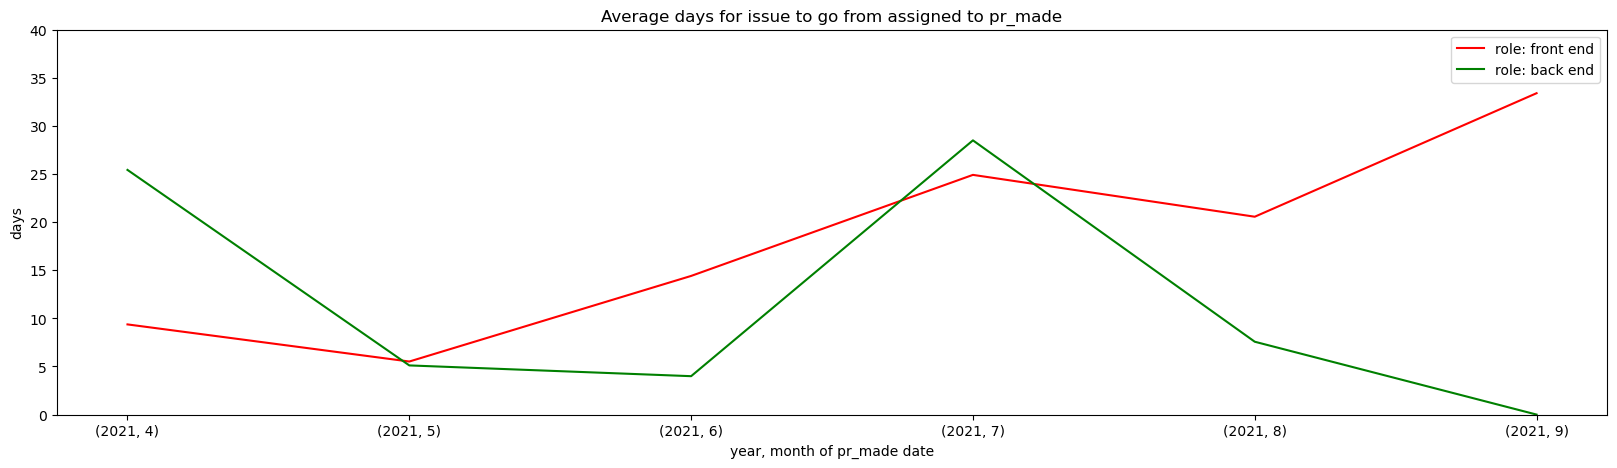

In [8]:
# Plotting
past_count = 6
base_round = 5
time1 = 'assigned'
time2 = 'pr_made'
all_y = []
plt.figure(figsize=(20,5))
x, y = get_time_diff_from_issue_df(issue_df, time1, time2, 'role: front end', 'product')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='r', label='role: front end')
x, y = get_time_diff_from_issue_df(issue_df, time1, time2, 'role: back end', 'product')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='g', label='role: back end')
plt.ylim([0, base_round * (round(max(all_y)/base_round) + 1)])
plt.title(f'Average days for issue to go from {time1} to {time2}')
plt.xlabel(f'year, month of {time2} date')
plt.ylabel('days')
plt.legend()
plt.show()

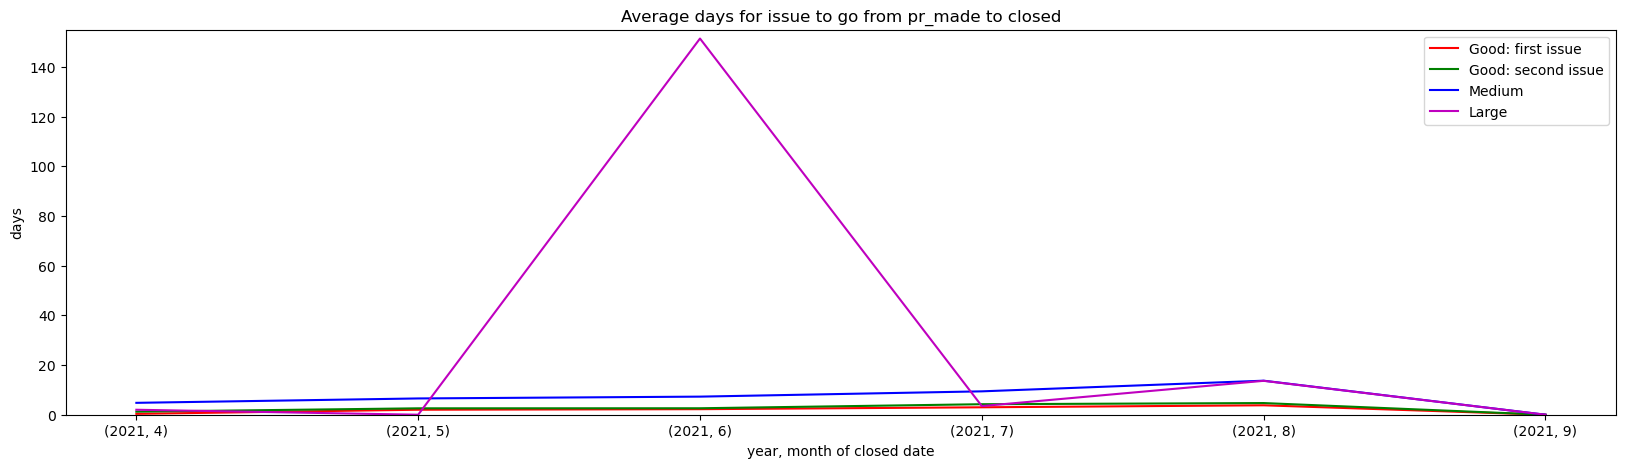

In [9]:
# Plotting
past_count = 6
base_round = 5
time1 = 'pr_made'
time2 = 'closed'
all_y = []
plt.figure(figsize=(20,5))
x, y = get_time_diff_from_issue_df(issue_df, time1, time2, 'first issue', 'product')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='r', label='Good: first issue')
x, y = get_time_diff_from_issue_df(issue_df, time1, time2, 'second issue', 'product')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='g', label='Good: second issue')
x, y = get_time_diff_from_issue_df(issue_df, time1, time2, 'medium', 'product')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='b', label='Medium')
x, y = get_time_diff_from_issue_df(issue_df, time1, time2, 'large', 'product')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='m', label='Large')
plt.ylim([0, base_round * (round(max(all_y)/base_round) + 1)])
plt.title(f'Average days for issue to go from {time1} to {time2}')
plt.xlabel(f'year, month of {time2} date')
plt.ylabel('days')
plt.legend()
plt.show()

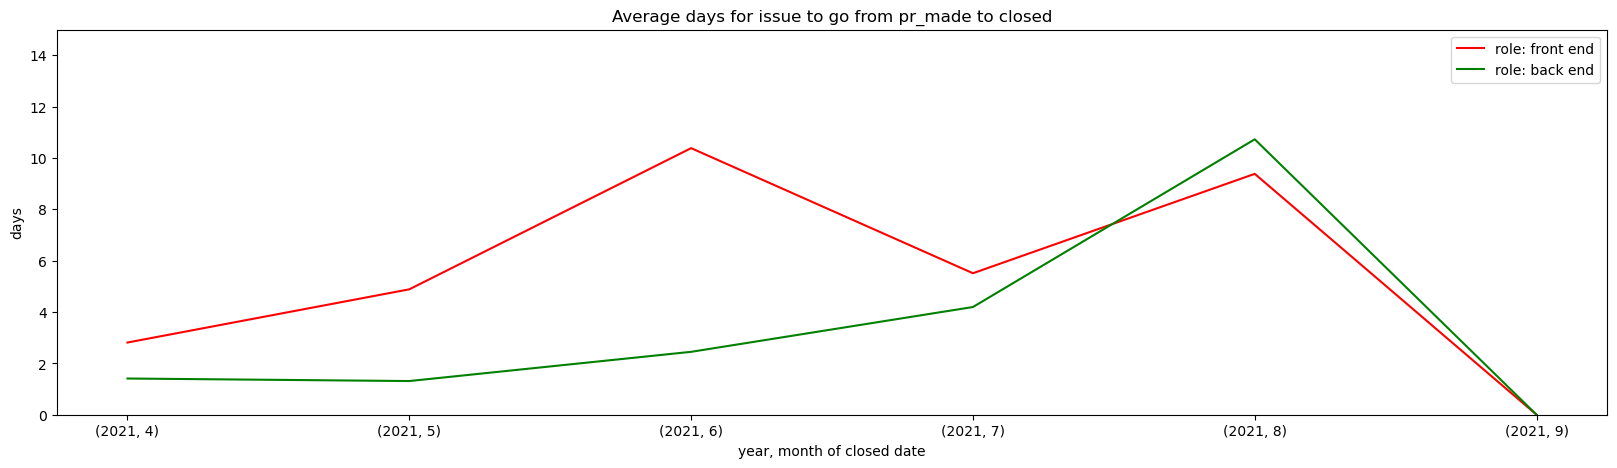

In [10]:
# Plotting
past_count = 6
base_round = 5
time1 = 'pr_made'
time2 = 'closed'
all_y = []
plt.figure(figsize=(20,5))
x, y = get_time_diff_from_issue_df(issue_df, time1, time2, 'role: front end', 'product')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='r', label='role: front end')
x, y = get_time_diff_from_issue_df(issue_df, time1, time2, 'role: back end', 'product')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='g', label='role: back end')
plt.ylim([0, base_round * (round(max(all_y)/base_round) + 1)])
plt.title(f'Average days for issue to go from {time1} to {time2}')
plt.xlabel(f'year, month of {time2} date')
plt.ylabel('days')
plt.legend()
plt.show()

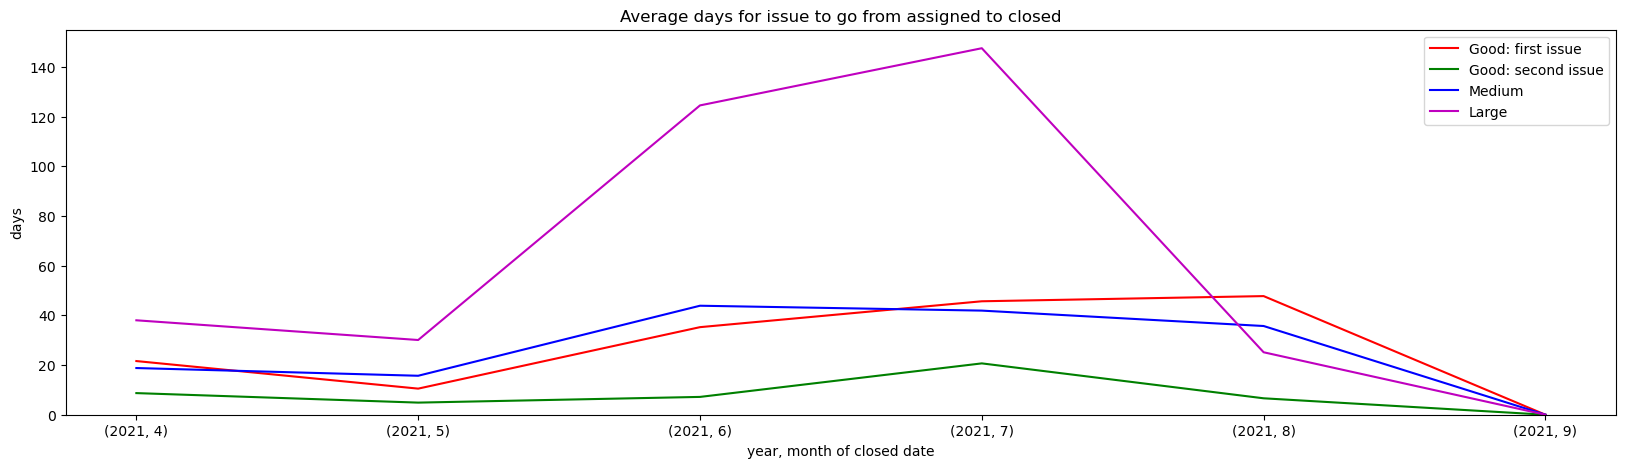

In [11]:
# Plotting
past_count = 6
base_round = 5
time1 = 'assigned'
time2 = 'closed'
all_y = []
plt.figure(figsize=(20,5))
x, y = get_time_diff_from_issue_df(issue_df, time1, time2, 'first issue', 'product')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='r', label='Good: first issue')
x, y = get_time_diff_from_issue_df(issue_df, time1, time2, 'second issue', 'product')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='g', label='Good: second issue')
x, y = get_time_diff_from_issue_df(issue_df, time1, time2, 'medium', 'product')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='b', label='Medium')
x, y = get_time_diff_from_issue_df(issue_df, time1, time2, 'large', 'product')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='m', label='Large')
plt.ylim([0, base_round * (round(max(all_y)/base_round) + 1)])
plt.title(f'Average days for issue to go from {time1} to {time2}')
plt.xlabel(f'year, month of {time2} date')
plt.ylabel('days')
plt.legend()
plt.show()

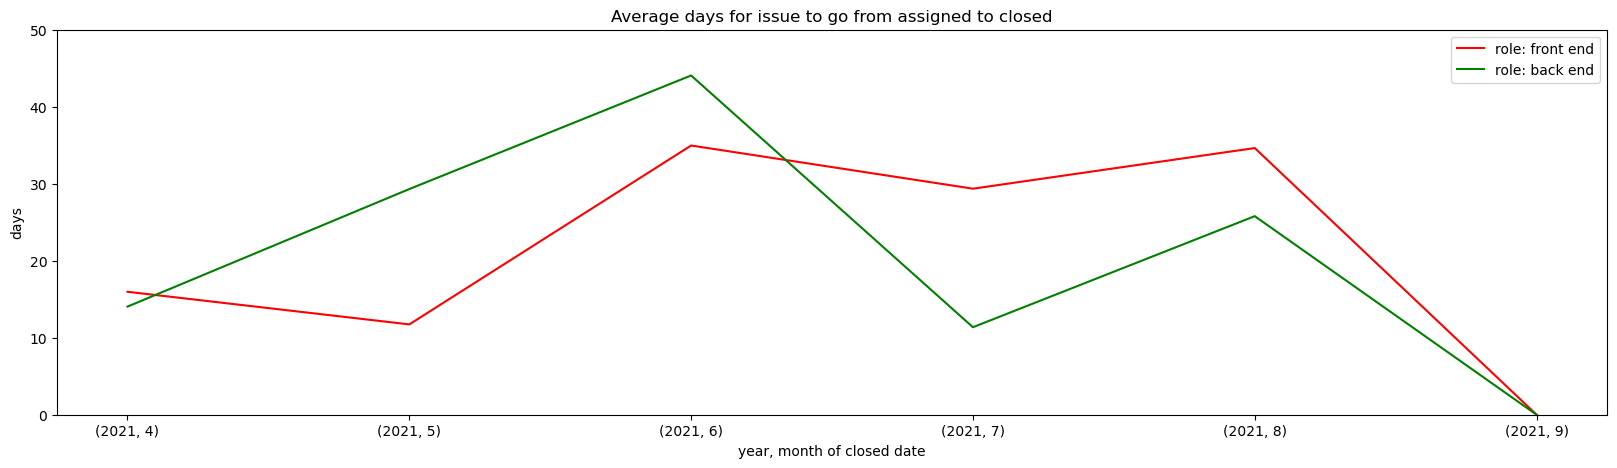

In [12]:
# Plotting
past_count = 6
base_round = 5
time1 = 'assigned'
time2 = 'closed'
all_y = []
plt.figure(figsize=(20,5))
x, y = get_time_diff_from_issue_df(issue_df, time1, time2, 'role: front end', 'product')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='r', label='role: front end')
x, y = get_time_diff_from_issue_df(issue_df, time1, time2, 'role: back end', 'product')
all_y.extend(y[-past_count:])
plt.plot(x[-past_count:], y[-past_count:], color='g', label='role: back end')
#x, y = get_time_diff_from_issue_df(issue_df, time1, time2, 'role: design', 'product')
#all_y.extend(y[-past_count:])
#plt.plot(x[-past_count:], y[-past_count:], color='b', label='role: design')
plt.ylim([0, base_round * (round(max(all_y)/base_round) + 1)])
plt.title(f'Average days for issue to go from {time1} to {time2}')
plt.xlabel(f'year, month of {time2} date')
plt.ylabel('days')
plt.legend()
plt.show()

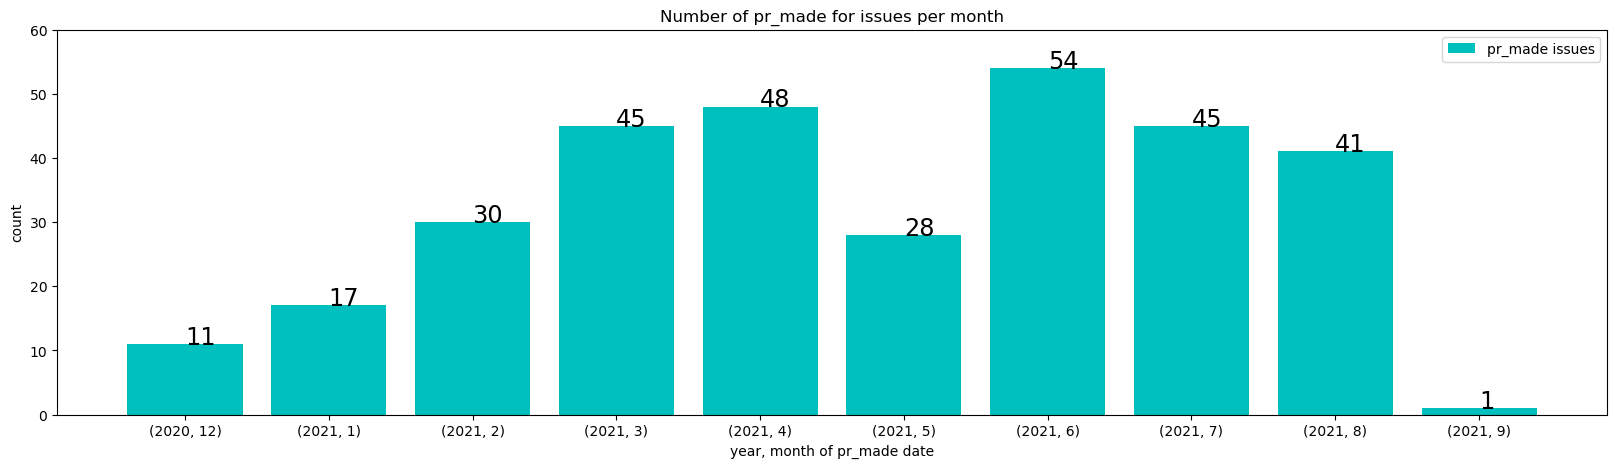

In [13]:
# Plotting
past_count = 10
base_round = 5
col_name = 'pr_made'
plt.figure(figsize=(20,5))
x, y = get_count_from_issue_df(issue_df, col_name)
plt.bar(x[-past_count:], y[-past_count:], color='c', label=f'{col_name} issues')
for index, val in enumerate(y[-past_count:]):
    plt.text(index, val, str(val), fontsize='xx-large')
plt.ylim([0, base_round * (round(max(y)/base_round) + 1)])
plt.title(f'Number of {col_name} for issues per month')
plt.xlabel(f'year, month of {col_name} date')
plt.ylabel('count')
plt.legend()
plt.show()

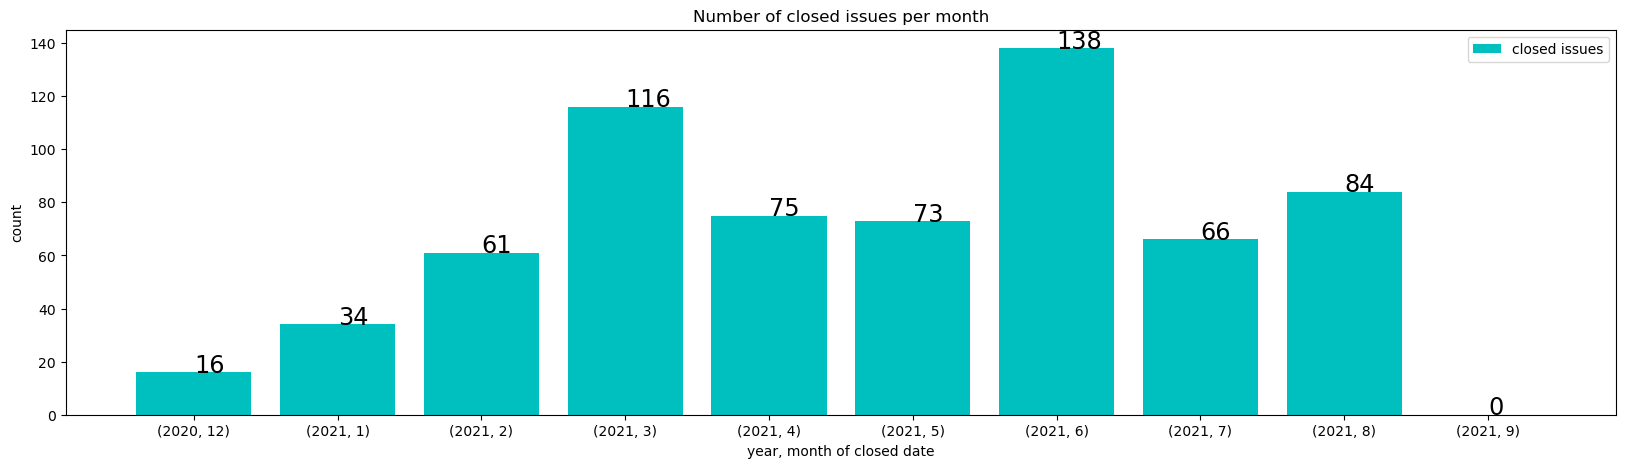

In [14]:
# Plotting
past_count = 10
base_round = 5
col_name = 'closed'
plt.figure(figsize=(20,5))
x, y = get_count_from_issue_df(issue_df, col_name)
plt.bar(x[-past_count:], y[-past_count:], color='c', label=f'{col_name} issues')
for index, val in enumerate(y[-past_count:]):
    plt.text(index, val, str(val), fontsize='xx-large')
plt.ylim([0, base_round * (round(max(y)/base_round) + 1)])
plt.title(f'Number of {col_name} issues per month')
plt.xlabel(f'year, month of {col_name} date')
plt.ylabel('count')
plt.legend()
plt.show()

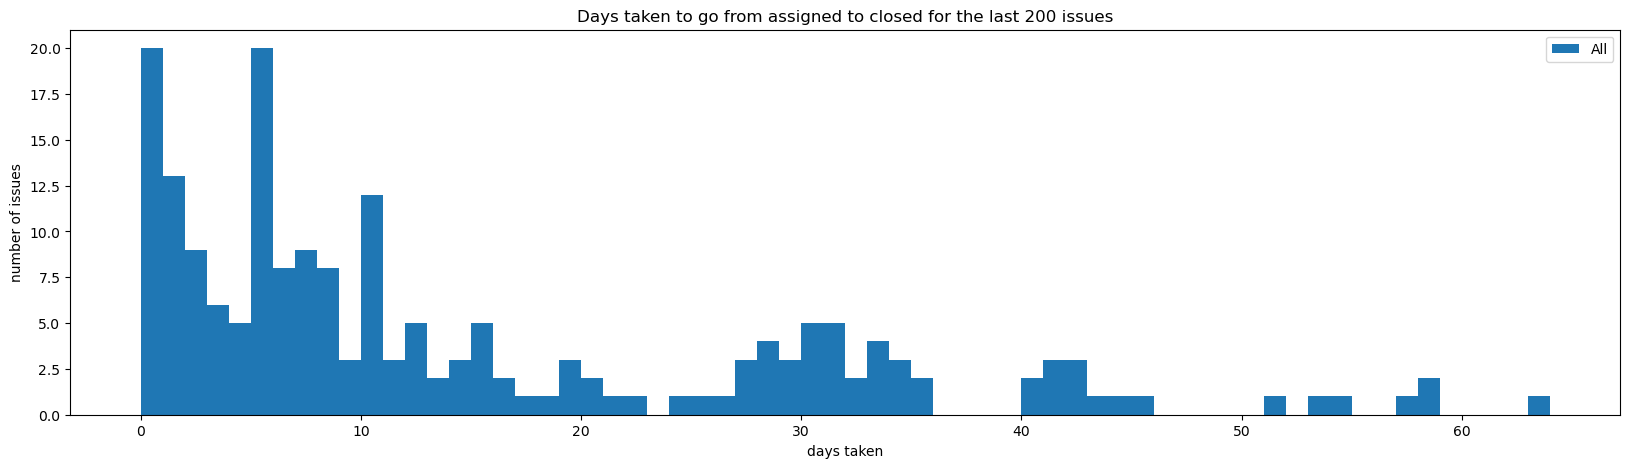

In [15]:
# Plotting
past_count = 200
base_round = 5
time1 = 'assigned'
time2 = 'closed'
plt.figure(figsize=(20,5))
y = iqr_outlier_filter(get_time_from_issue_df(issue_df, time1, time2)[-past_count:])
n_bins = [num for num in range(math.ceil(max(y)) + 1)]
plt.hist(y, bins=n_bins, label='All')
plt.title(f'Days taken to go from {time1} to {time2} for the last {past_count} issues')
plt.xlabel(f'days taken')
plt.ylabel('number of issues')
plt.legend()
plt.show()

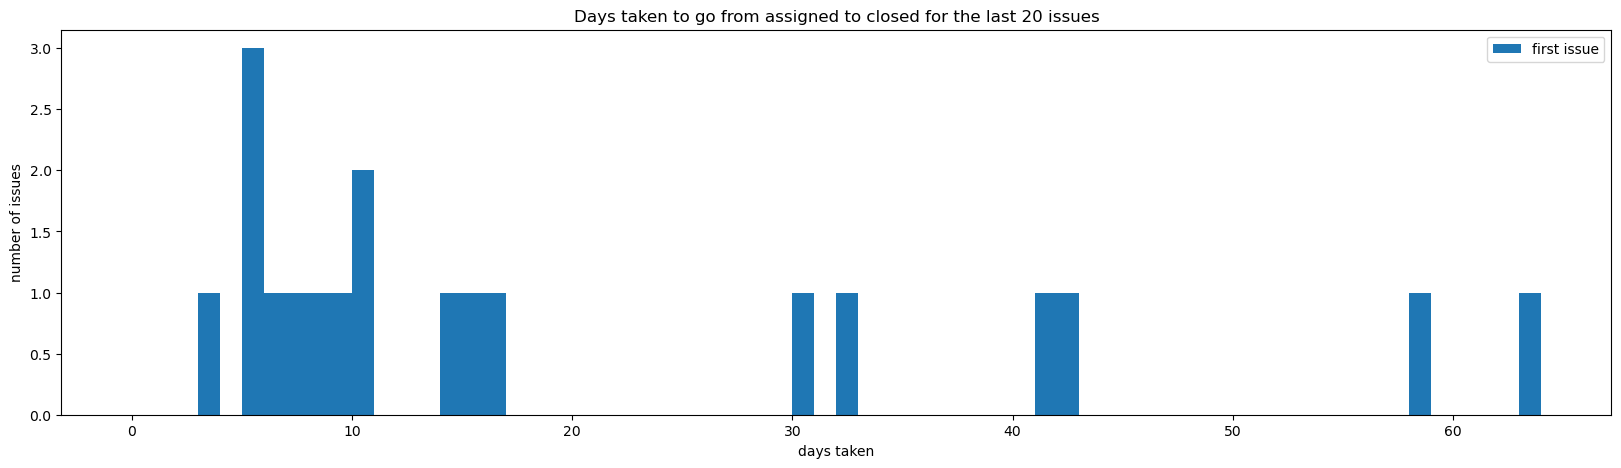

In [16]:
# Plotting
past_count = 20
base_round = 5
time1 = 'assigned'
time2 = 'closed'
label = 'first issue'
plt.figure(figsize=(20,5))
y = iqr_outlier_filter(get_time_from_issue_df(issue_df, time1, time2, label)[-past_count:])
n_bins = [num for num in range(math.ceil(max(y)) + 1)]
plt.hist(y, bins=n_bins, label=label)
plt.title(f'Days taken to go from {time1} to {time2} for the last {past_count} issues')
plt.xlabel(f'days taken')
plt.ylabel('number of issues')
plt.legend()
plt.show()

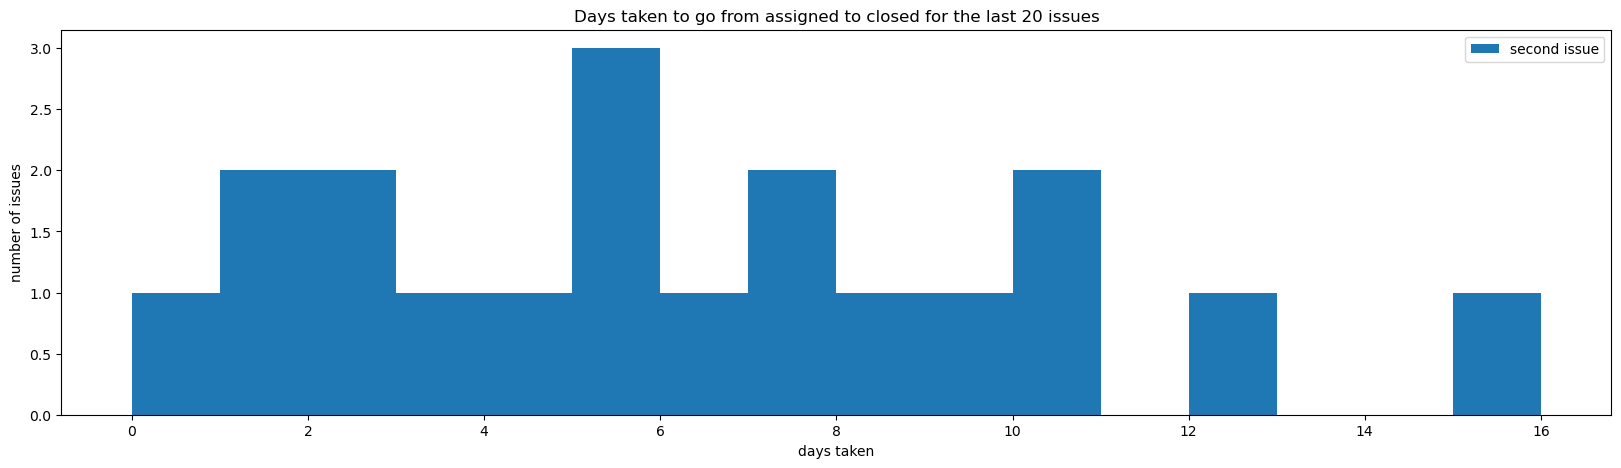

In [17]:
# Plotting
past_count = 20
base_round = 5
time1 = 'assigned'
time2 = 'closed'
label = 'second issue'
plt.figure(figsize=(20,5))
y = iqr_outlier_filter(get_time_from_issue_df(issue_df, time1, time2, label)[-past_count:])
n_bins = [num for num in range(math.ceil(max(y)) + 1)]
plt.hist(y, bins=n_bins, label=label)
plt.title(f'Days taken to go from {time1} to {time2} for the last {past_count} issues')
plt.xlabel(f'days taken')
plt.ylabel('number of issues')
plt.legend()
plt.show()

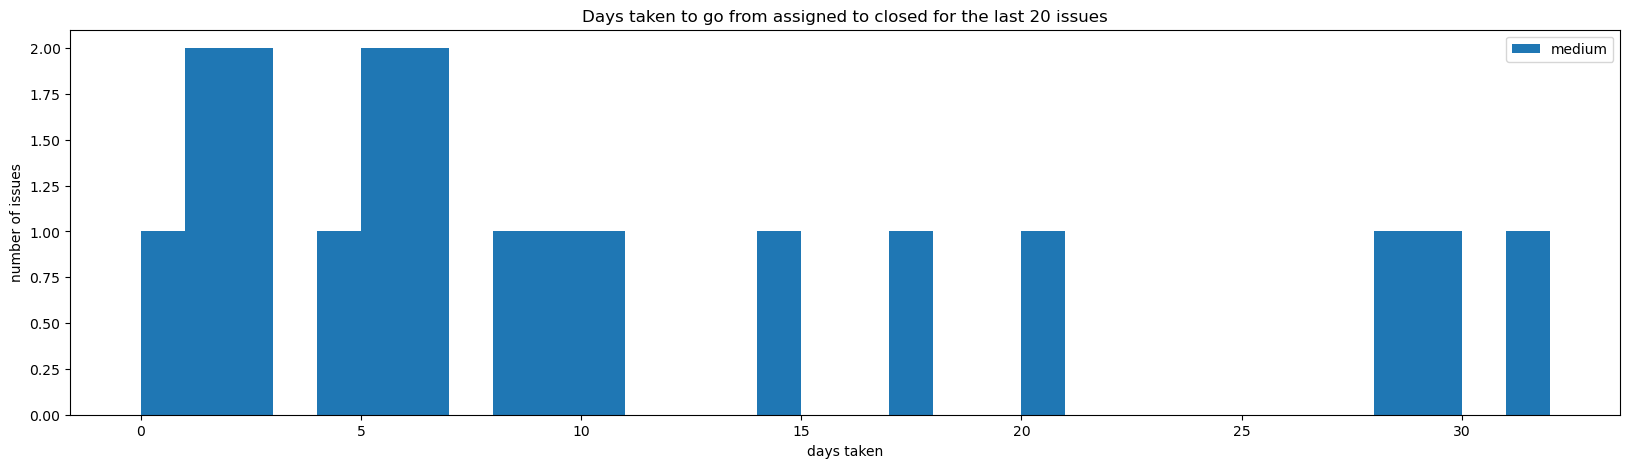

In [18]:
# Plotting
past_count = 20
base_round = 5
time1 = 'assigned'
time2 = 'closed'
label = 'medium'
plt.figure(figsize=(20,5))
y = iqr_outlier_filter(get_time_from_issue_df(issue_df, time1, time2, label)[-past_count:])
n_bins = [num for num in range(math.ceil(max(y)) + 1)]
plt.hist(y, bins=n_bins, label=label)
plt.title(f'Days taken to go from {time1} to {time2} for the last {past_count} issues')
plt.xlabel(f'days taken')
plt.ylabel('number of issues')
plt.legend()
plt.show()

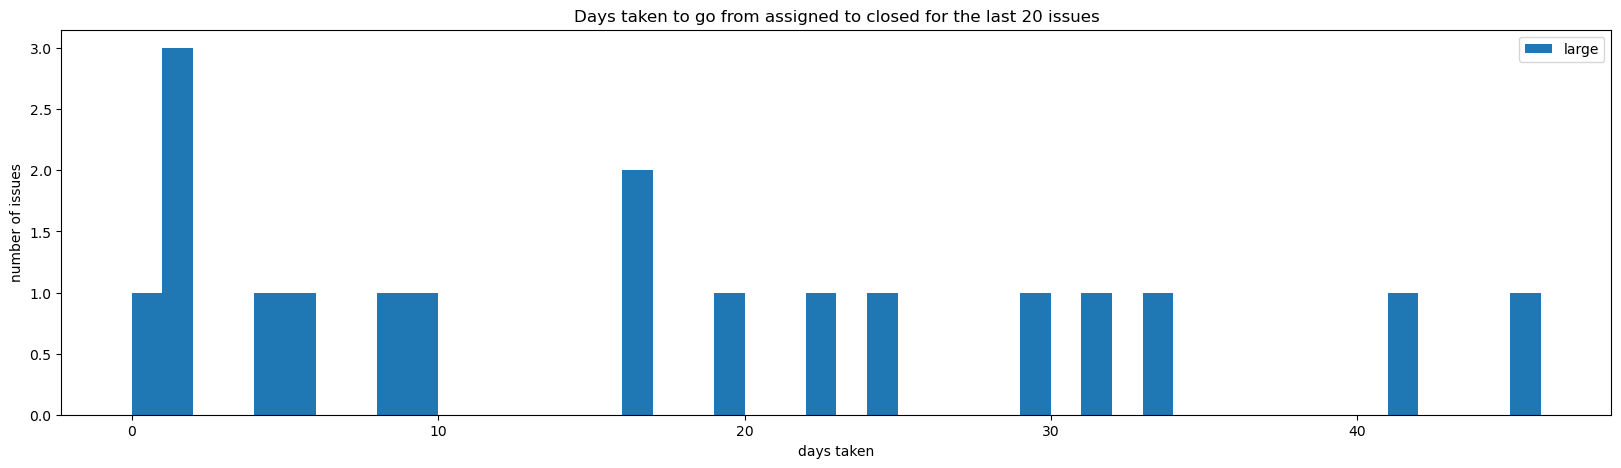

In [19]:
# Plotting
past_count = 20
base_round = 5
time1 = 'assigned'
time2 = 'closed'
label = 'large'
plt.figure(figsize=(20,5))
y = iqr_outlier_filter(get_time_from_issue_df(issue_df, time1, time2, label)[-past_count:])
n_bins = [num for num in range(math.ceil(max(y)) + 1)]
plt.hist(y, bins=n_bins, label=label)
plt.title(f'Days taken to go from {time1} to {time2} for the last {past_count} issues')
plt.xlabel(f'days taken')
plt.ylabel('number of issues')
plt.legend()
plt.show()